D:\PROGRAMI\Anaconda\lib\site-packages\skimage\filters\thresholding.py:222: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,


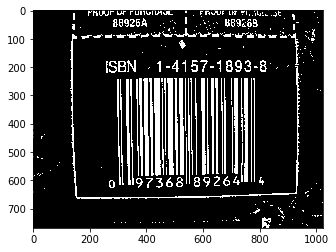

In [76]:
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np
from skimage.io import imread

img_barcode = imread('images/barcode.jpg')

from skimage.color import rgb2gray
img_barcode_gray = rgb2gray(img_barcode)

from skimage.filters import threshold_adaptive

img_barcode_tr = 1-threshold_adaptive(img_barcode_gray, block_size=75, offset=0.04)  # pogledajte u dokumentaciji sta su parametri
plt.imshow(img_barcode_tr, 'gray')

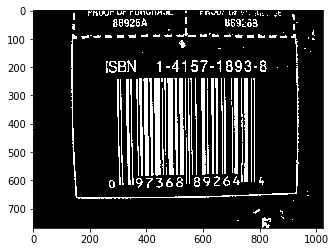

In [77]:
from skimage.morphology import opening, closing
from skimage.morphology import square, diamond, disk

img_barcode_tr_cl = opening(img_barcode_tr, selem=square(3))
plt.imshow(img_barcode_tr_cl, 'gray')

In [78]:
from skimage.measure import label  
from skimage.measure import regionprops

labeled_img = label(img_barcode_tr_cl)
regions = regionprops(labeled_img)

In [79]:
def draw_regions(regs, img_size):
    img_r = np.ndarray((img_size[0], img_size[1]), dtype='float32')
    for reg in regs:
        coords = reg.coords
        for coord in coords:
            if coord[0] < 150:
                img_r[coord[0], coord[1]] = 0
            else:
                img_r[coord[0], coord[1]] = 1
    return img_r

In [80]:
regions_barcode = []
for region in regions:
    bbox = region.bbox
    h = bbox[2] - bbox[0]
    w = bbox[3] - bbox[1]
    if float(h) / w < 3:
        regions_barcode.append(region)

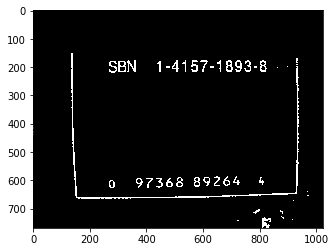

In [81]:
plt.imshow(draw_regions(regions_barcode, img_barcode_tr_cl.shape), 'gray')

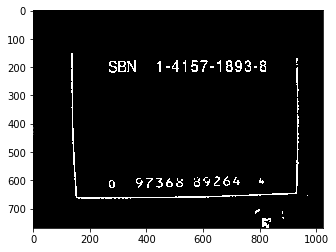

In [82]:
img = draw_regions(regions_barcode, img_barcode_tr_cl.shape)
new_img = opening(img, selem=square(4))
plt.imshow(new_img, 'gray')

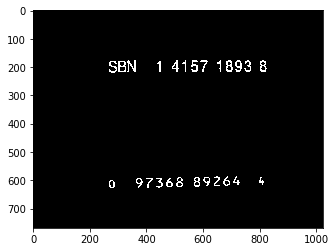

In [83]:
areas = []
for region in regions:
    x = region.area
    
    bbox = region.bbox
    h = bbox[2] - bbox[0]  # visina
    w = bbox[3] - bbox[1]  # sirina
    if x > 210 and x < 700 and float(h) / w < 3:
        areas.append(region)

plt.imshow(draw_regions(areas, new_img.shape), 'gray')